# Figure 15 - Huang et al. 2023
https://ui.adsabs.harvard.edu/abs/2023ApJ...951..123H/abstract

In [2]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import numpy as np

## Case B

Atmosphere Composition
  Species:   HI,        HeI,        MgII,        FeII,        SiII,        OI,        CI,        NI,        SI,        CaII
  Mass frac: 7.87e-01, 2.00e-01, 6.48e-04, 1.21e-03, 7.39e-04, 6.69e-03, 2.29e-03, 7.90e-04, 3.60e-04, 6.36e-05



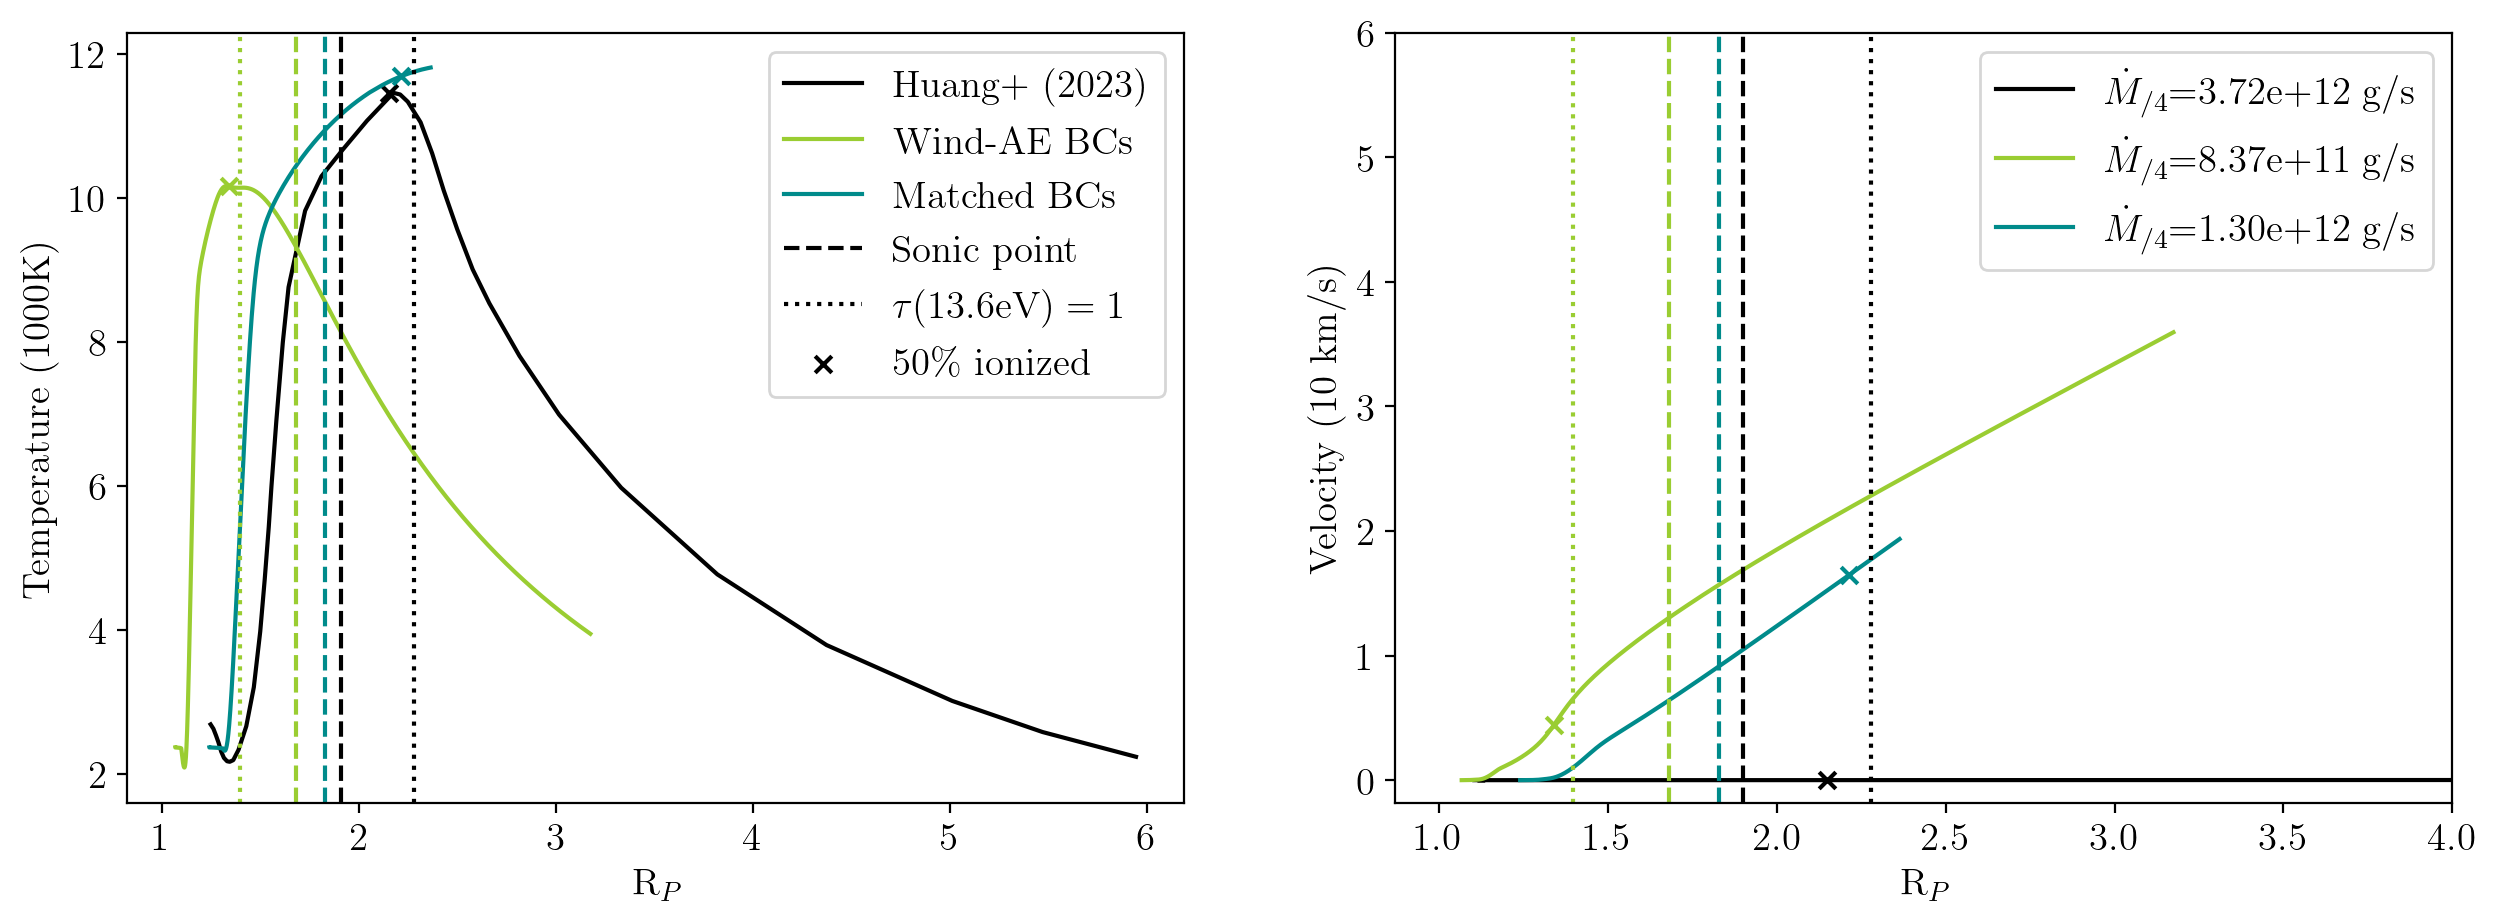

In [ ]:
sim=wind_sim()
def ion50(sim):
    Ys_tot = np.zeros_like(sim.windsoln.soln['r'])
    for sp in sim.windsoln.species_list:
        sp = sp.replace(' ','')
        Ys_tot += sim.windsoln.soln['n_'+sp+'I']
    tot_ion = Ys_tot/sim.windsoln.soln['n_tot']
    r = sim.windsoln.soln_norm['r']

    return r[np.searchsorted(tot_ion,0.5)]

sim.load_planet('data/Huang_caseB_windae_matchedBCs.csv')
r = sim.windsoln.soln_norm['r']
sim2=wind_sim()
sim2.load_uservars('data/Huang_caseB_windae.csv')
r2 = sim2.windsoln.soln_norm['r']

r = sim.windsoln.soln_norm['r']
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
r_T,T = np.genfromtxt('data/Huang_temperature.csv',delimiter=',',
                      skip_header=1).T #1 K
plt.plot(r_T,T/1000,c='k',label='Huang+ (2023)')
plt.plot(r2,sim2.windsoln.soln['T']/1000,c='yellowgreen',label='Wind-AE BCs')
plt.plot(r,sim.windsoln.soln['T']/1000,c='darkcyan',label='Matched BCs')
plt.axvline(sim.windsoln.R_sp,ls='--',c='darkcyan')
plt.axvline(sim2.windsoln.R_sp,ls='--',c='yellowgreen')
plt.axvline(1.91,c='k',ls='--',label='Sonic point')
plt.axvline(2.28,c='k',ls=':',label=r'$\tau(13.6\rm{eV})=1$')
# plt.axvline(sim.windsoln.calc_tau1_radius(13.6),c='darkcyan',ls=':')
plt.axvline(sim2.windsoln.calc_tau1_radius(13.6)[0],c='yellowgreen',ls=':')
plt.scatter(2.15,(T/1000)[np.searchsorted(r_T,2.15)],c='k',marker='x',label=r'50$\%$ ionized')
ion50_1 = ion50(sim)
plt.scatter(ion50_1,(sim.windsoln.soln['T']/1000)[np.searchsorted(r,ion50_1)],c='darkcyan',marker='x')
ion50_2 = ion50(sim2)
plt.scatter(ion50_2,(sim2.windsoln.soln['T']/1000)[np.searchsorted(r2,ion50_2)],c='yellowgreen',marker='x')
plt.ylabel('Temperature (1000K)')
plt.xlabel(r'R$_P$')
plt.legend()
# plt.show()

plt.subplot(1,2,2)
r_v,v = np.genfromtxt('data/velocity.csv',delimiter=',',
                      skip_header=1).T #m/s
plt.plot(r_v,v/10000,label=r'$\dot{M}_{/4}$=%.2e g/s'%3.72e12,c='k')
plt.plot(r2,sim2.windsoln.soln['v']/1e6,c='yellowgreen',label=r'$\dot{M}_{/4}$=%.2e g/s' %(sim2.windsoln.Mdot*3/4))
plt.plot(r,sim.windsoln.soln['v']/1e6,c='darkcyan',label=r'$\dot{M}_{/4}$=%.2e g/s' %(sim.windsoln.Mdot*3/4))
plt.axvline(sim.windsoln.R_sp,ls='--',c='darkcyan')
plt.axvline(sim2.windsoln.R_sp,ls='--',c='yellowgreen')
ion50_1 = ion50(sim)
plt.scatter(ion50_1,(sim.windsoln.soln['v']/1e6)[np.searchsorted(r,ion50_1)],c='darkcyan',marker='x')
ion50_2 = ion50(sim2)
plt.scatter(ion50_2,(sim2.windsoln.soln['v']/1e6)[np.searchsorted(r2,ion50_2)],c='yellowgreen',marker='x')
plt.scatter(2.15,(v/10000)[np.searchsorted(r_v,2.15)],c='k',marker='x')
plt.axvline(2.28,c='k',ls=':')
# plt.axvline(sim.windsoln.calc_tau1_radius(13.6),c='darkcyan',ls=':')
plt.axvline(sim2.windsoln.calc_tau1_radius(13.6)[0],c='yellowgreen',ls=':')
plt.axvline(1.9,c='k',ls='--')
plt.ylabel('Velocity (10 km/s)')
plt.xlabel(r'R$_P$')
plt.xlim(right=4)
plt.ylim(top=6)
plt.legend()
plt.show()